In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Housing.csv")

In [4]:
df['RIVER'] = df['RIVER'].map({'Yes': 1, 'No': 0})

In [5]:
corr = df.drop(columns='RIVER_BINARY', errors='ignore').corr()

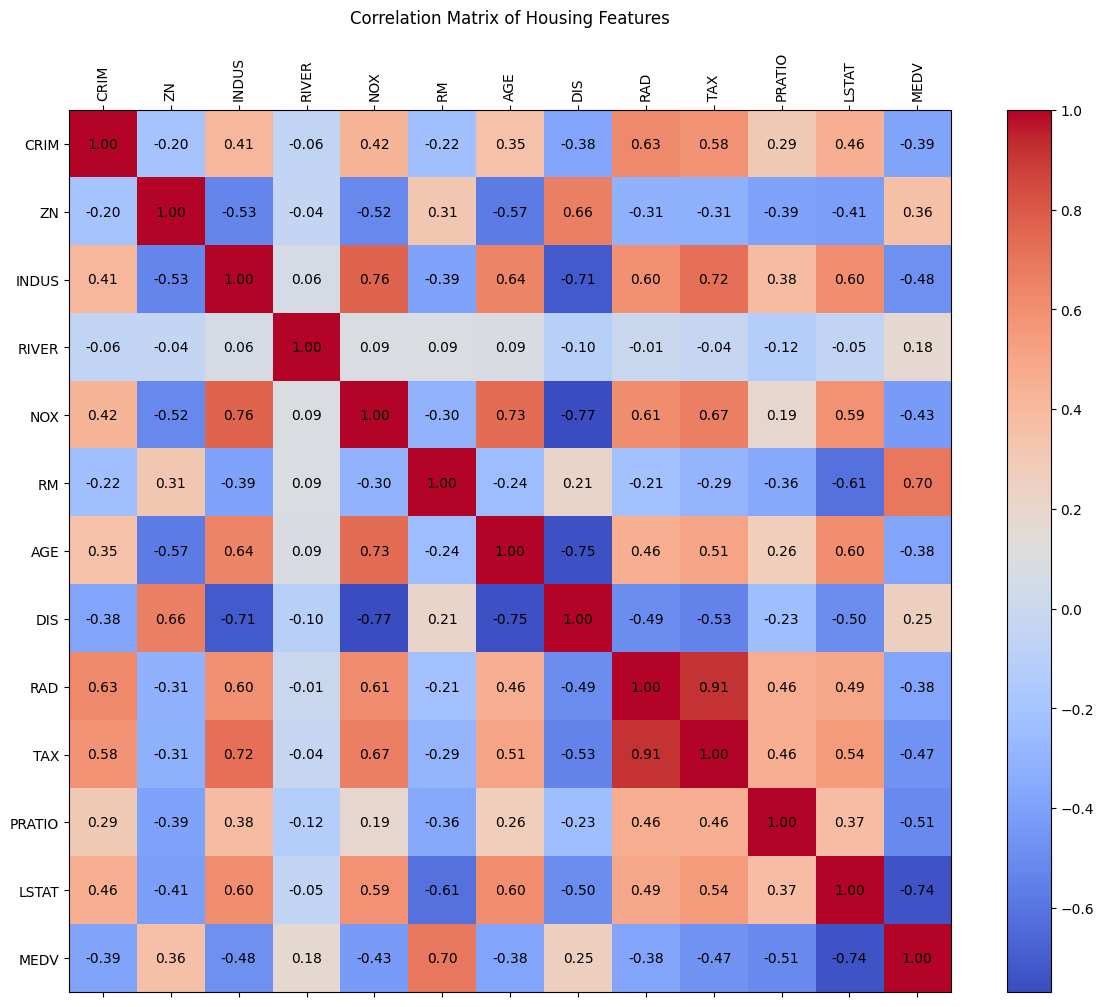

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)

for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Matrix of Housing Features", pad=20)
plt.tight_layout()
plt.show()

Linear Regression Model

In [16]:
X = df.drop(columns=['MEDV'])
X['RIVER'] = df['RIVER']
y = df['MEDV']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 28.985982586392538
R-squared: 0.6841781884310355


In [21]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("Model Coefficients:\n", coefficients)

Model Coefficients:
    Feature  Coefficient
0     CRIM    -0.127603
1       ZN     0.046230
2    INDUS    -0.005107
3    RIVER     2.896940
4      NOX   -15.446502
5       RM     3.808645
6      AGE     0.007015
7      DIS    -1.392155
8      RAD     0.237284
9      TAX    -0.010845
10  PRATIO    -0.968410
11   LSTAT    -0.546033
